## Observations and Insights 

In [218]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [219]:
# Combine the data into a single dataset
combined = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [220]:
# Checking the number of mice.
mice_num = combined['Mouse ID'].nunique()
mice_num

249

In [221]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
cleaned = combined.drop_duplicates(subset=['Mouse ID','Timepoint'])
cleaned

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [222]:
# Optional: Get all the data for the duplicate mouse ID. 



In [223]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [224]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_num = cleaned['Mouse ID'].nunique()
cleaned_mice_num

249

## Summary Statistics

In [225]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
stats_dataframe =  pd.DataFrame()

stats_dataframe['Mean Tumor Volume'] = cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
stats_dataframe['Median Tumor Volume'] = cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
stats_dataframe['Mode Tumor Volume'] = cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(pd.Series.mode)
stats_dataframe['Tumor Volume Variance'] = cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].var(ddof = 0)
stats_dataframe['Tumor Standard Error of the Mean'] = cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem(ddof = 0)

stats_dataframe

,Mean Tumor Volume,Median Tumor Volume,Mode Tumor Volume,Tumor Volume Variance,Tumor Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,45.0,24.839296,0.328629
Ceftamin,52.591172,51.776157,45.0,39.069446,0.468499
Infubinol,52.884795,51.820584,45.0,42.886388,0.490851
Ketapril,55.235638,53.698743,45.0,68.188930,0.602252
Naftisol,54.331565,52.509285,45.0,65.817708,0.594860
Placebo,54.033581,52.288934,45.0,60.830138,0.579722
Propriva,52.393463,50.909965,45.0,42.862273,0.524174
Ramicane,40.216745,40.673236,45.0,23.383692,0.320250
Stelasyn,54.233149,52.431737,45.0,59.122106,0.571526


In [226]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_stats_df = cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([np.mean, np.median, sts.mode, np.var, 'sem'])
agg_stats_df

,mean,median,mode,var,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,"([45.0], [25])",24.947764,0.329346
Ceftamin,52.591172,51.776157,"([45.0], [25])",39.290177,0.469821
Infubinol,52.884795,51.820584,"([45.0], [25])",43.128684,0.492236
Ketapril,55.235638,53.698743,"([45.0], [25])",68.553577,0.603860
Naftisol,54.331565,52.509285,"([45.0], [25])",66.173479,0.596466
Placebo,54.033581,52.288934,"([45.0], [25])",61.168083,0.581331
Propriva,52.393463,50.909965,"([45.0], [25])",43.138803,0.525862
Ramicane,40.216745,40.673236,"([45.0], [25])",23.486704,0.320955
Stelasyn,54.233149,52.431737,"([45.0], [24])",59.450562,0.573111


## Bar and Pie Charts

<AxesSubplot:>

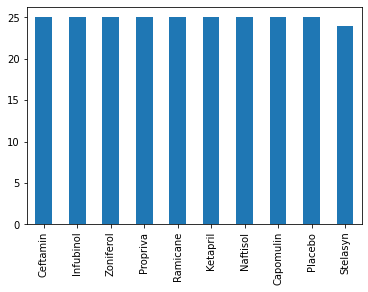

In [227]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
unique_mice = cleaned.loc[cleaned['Timepoint'] == 0]
unique_mice
unique_mice_vc = unique_mice['Drug Regimen'].value_counts()
unique_mice_df.plot(kind = 'bar')

<BarContainer object of 10 artists>

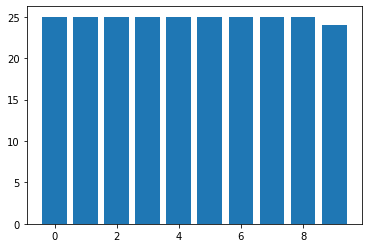

In [228]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(unique_mice_df))
unique_mice_cts = unique_mice['Drug Regimen'].value_counts()

plt.bar(x_axis, unique_mice_cts)

<AxesSubplot:ylabel='Sex'>

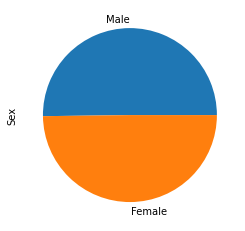

In [229]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex = unique_mice['Sex'].value_counts()
mice_sex.plot(kind = 'pie')

([<matplotlib.patches.Wedge at 0x1d3ffabd390>,
 [Text(-0.0069391759767656585, 1.0999781124353174, 'Male'),
  Text(0.006939175976765524, -1.0999781124353174, 'Female')])

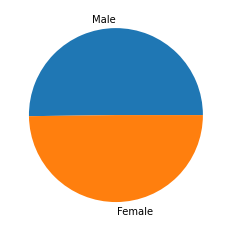

In [230]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_genders = cleaned['Sex'].unique()
plt.pie(mice_sex, labels = mice_genders)

## Quartiles, Outliers and Boxplots

In [231]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
biggest_timepoint = cleaned.groupby('Mouse ID')['Timepoint'].max()

In [232]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_vol_df = pd.merge(cleaned, biggest_timepoint, how = 'inner' ,on = ['Mouse ID', 'Timepoint'])
tumor_vol_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [233]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []


for treatment in treatment_list:
    tumor_vol_list.append(tumor_vol_df.loc[tumor_vol_df['Drug Regimen'] == treatment])
    
capomulin_volumes = tumor_vol_list[0]['Tumor Volume (mm3)']
ramicane_volumes = tumor_vol_list[1]['Tumor Volume (mm3)']
infubinol_volumes = tumor_vol_list[2]['Tumor Volume (mm3)']
ceftamin_volumes = tumor_vol_list[3]['Tumor Volume (mm3)']

four_treatments_df = pd.DataFrame({
    'Capomulin': capomulin_volumes,
    'Ramicane': ramicane_volumes,
    'Infubinol': infubinol_volumes,
    'Ceftamin': ceftamin_volumes
})

# four_treatments_df
capomulin_volumes.sort_values()
ramicane_volumes.sort_values()
infubinol_volumes.sort_values()
ceftamin_volumes.sort_values()

228    45.000000
65     45.000000
200    45.000000
195    45.000000
135    46.784535
111    47.784682
97     48.722078
199    52.925348
68     55.742829
66     56.057749
134    57.918381
155    59.741901
136    59.851956
235    61.386660
171    61.433892
118    61.849023
52     62.999356
175    64.192341
139    64.299830
232    64.634949
242    64.729837
216    67.527482
133    67.748662
241    68.594745
122    68.923185
Name: Tumor Volume (mm3), dtype: float64

In [234]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Note: cap = Capomulin, ram = Ramicane, inf = Infubinol, cef = Ceftamin
cap_quarts = capomulin_volumes.quantile([0.25, 0.5, 0.75])
cap_lowerq = cap_quarts[0.25]
cap_upperq = cap_quarts[0.75]
cap_iqr = cap_upperq - cap_lowerq
cap_iqr
cap_mean = capomulin_volumes.mean()

ram_quarts = ramicane_volumes.quantile([0.25, 0.5, 0.75])
ram_lowerq = ram_quarts[0.25]
ram_upperq = ram_quarts[0.75]
ram_iqr = ram_upperq - ram_lowerq
ram_iqr
ram_mean = ramicane_volumes.mean()

inf_quarts = infubinol_volumes.quantile([0.25, 0.5, 0.75])
inf_lowerq = inf_quarts[0.25]
inf_upperq = inf_quarts[0.75]
inf_iqr = inf_upperq - inf_lowerq
inf_iqr
inf_mean = infubinol_volumes.mean()

cef_quarts = ceftamin_volumes.quantile([0.25, 0.5, 0.75])
cef_lowerq = cef_quarts[0.25]
cef_upperq = cef_quarts[0.75]
cef_iqr = cef_upperq - cef_lowerq
cef_iqr
cef_mean = ceftamin_volumes.mean()

# create summary dataframe for IQR and other data:
iqr_dict = {
    'Treatment': ['Capomulin','Ramicane','Infubinol','Ceftamin'],
    'IQR': [cap_iqr, ram_iqr, inf_iqr, cef_iqr],
    'Means': [cap_mean, ram_mean, inf_mean, cef_mean],
    'Upper Bounds': [cap_upperq, ram_upperq, inf_upperq, cef_upperq],
    'Lower Bounds': [cap_lowerq, ram_lowerq, inf_lowerq, cef_lowerq]
}
iqr_df = pd.DataFrame(iqr_dict)
iqr_df = iqr_df.set_index('Treatment')
iqr_df

,IQR,Means,Upper Bounds,Lower Bounds
Treatment,,,,
Capomulin,7.781863,36.667568,40.159220,32.377357
Ramicane,9.098537,36.191390,40.659006,31.560470
Infubinol,11.477135,58.178246,65.525743,54.048608
Ceftamin,15.577752,57.753977,64.299830,48.722078


In [235]:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

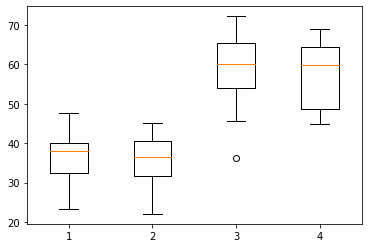

In [236]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.boxplot([capomulin_volumes, ramicane_volumes, infubinol_volumes, ceftamin_volumes])
plt.show()

## Line and Scatter Plots

In [237]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# create df of mouse s185
cap_mouse = cleaned.loc[cleaned['Mouse ID'] == 's185']
cap_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


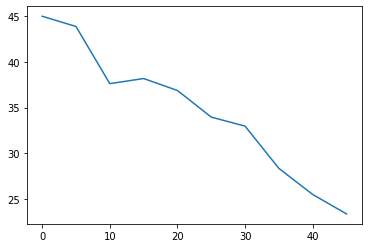

In [238]:
# line plot:
cap_x_axis = np.arange(0, 50, 5)
cap_x_axis
cap_tumor_vol = cap_mouse['Tumor Volume (mm3)']

plt.plot(cap_x_axis, cap_tumor_vol)
plt.show()

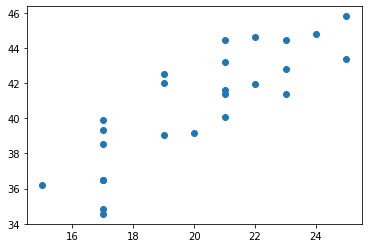

In [239]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumor_vol_weight = pd.DataFrame()
cap_mice = cleaned.loc[cleaned['Drug Regimen'] == 'Capomulin']
avg_tumor_vol = cap_mice.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

mice_weights = cap_mice.groupby('Mouse ID')['Weight (g)'].mean()


plt.scatter(mice_weights, avg_tumor_vol)
plt.show()

## Correlation and Regression

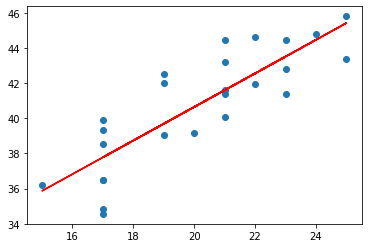

In [245]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = sts.pearsonr(mice_weights, avg_tumor_vol)

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(mice_weights, avg_tumor_vol)
regress_values = mice_weights * slope + intercept
line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept,2))
plt.scatter(mice_weights, avg_tumor_vol)
plt.plot(mice_weights, regress_values, 'r-')
plt.show()